In [2]:
import pandas as pd

# Load the datasets
applications_df = pd.read_csv('cleaned_applications.csv')
branches_df = pd.read_csv('cleaned_branches.csv')
customers_df = pd.read_csv('cleaned_customers.csv')
defaults_df = pd.read_csv('cleaned_defaults.csv')
loans_df = pd.read_csv('cleaned_loans.csv')
transactions_df = pd.read_csv('cleaned_transactions.csv')

print("Datasets loaded successfully.")

Datasets loaded successfully.


In [3]:
applications_df['Application_Date'] = pd.to_datetime(applications_df['Application_Date'])
loans_df['Disbursal_Date'] = pd.to_datetime(loans_df['Disbursal_Date'])

merged_df = pd.merge(applications_df, loans_df, on=['Loan_ID', 'Customer_ID'], how='inner')

merged_df['Processing_Time_Days'] = (merged_df['Disbursal_Date'] - merged_df['Application_Date']).dt.days

display(merged_df[['Application_ID', 'Loan_ID', 'Customer_ID', 'Application_Date', 'Disbursal_Date', 'Processing_Time_Days']].head())

Empty DataFrame
Columns: [Application_ID, Loan_ID, Customer_ID, Application_Date, Disbursal_Date, Processing_Time_Days]
Index: []

In [4]:
merged_df = pd.merge(applications_df, loans_df, on='Loan_ID', how='inner')

merged_df['Processing_Time_Days'] = (merged_df['Disbursal_Date'] - merged_df['Application_Date']).dt.days

display(merged_df[['Application_ID', 'Loan_ID', 'Customer_ID_x', 'Application_Date', 'Disbursal_Date', 'Processing_Time_Days']].head())

Application_ID  Loan_ID Customer_ID_x Application_Date Disbursal_Date  \
0        A000001  L000001       C000001       2022-05-11     2023-03-25   
1        A000002  L000002       C000002       2022-03-18     2023-10-23   
2        A000003  L000003       C000003       2022-01-17     2024-07-30   
3        A000004  L000004       C000004       2019-03-09     2024-11-22   
4        A000005  L000005       C000005       2024-07-18     2024-03-30   

   Processing_Time_Days  
0                   318  
1                   584  
2                   925  
3                  2085  
4                  -110

Descriptive statistics for Processing_Time_Days:


count    70000.000000
mean       172.191700
std        824.317006
min      -1822.000000
25%       -424.000000
50%        171.000000
75%        769.000000
max       2184.000000
Name: Processing_Time_Days, dtype: float64

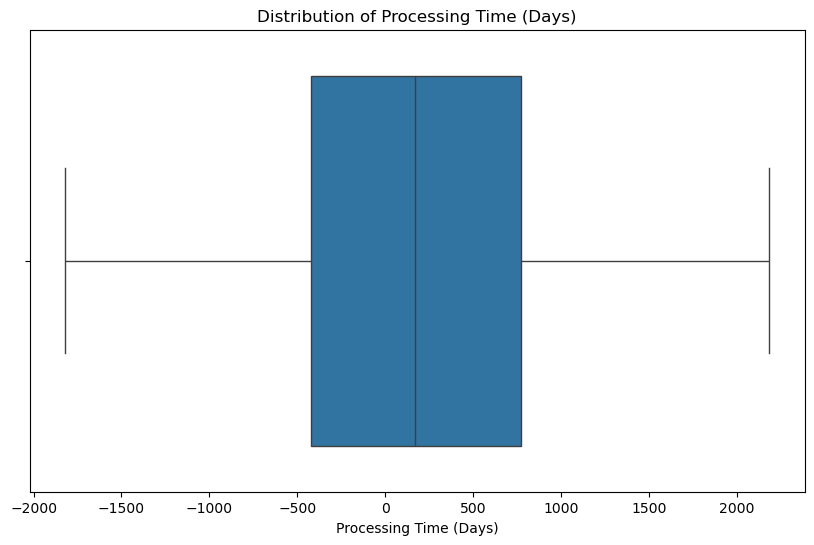

In [5]:
print("Descriptive statistics for Processing_Time_Days:")
display(merged_df['Processing_Time_Days'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['Processing_Time_Days'])
plt.title('Distribution of Processing Time (Days)')
plt.xlabel('Processing Time (Days)')
plt.show()

In [6]:
# Identify unusually long processing times. Assuming positive values are valid, negative values are unusual.
unusually_long_processing_times = merged_df[merged_df['Processing_Time_Days'] < 0]

print("\nUnusually long processing times (negative values):")
display(unusually_long_processing_times.head())

# Define a threshold for unusually long processing times based on the distribution (e.g., beyond the 75th percentile + 1.5*IQR)
Q1 = merged_df['Processing_Time_Days'].quantile(0.25)
Q3 = merged_df['Processing_Time_Days'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

long_processing_times = merged_df[merged_df['Processing_Time_Days'] > upper_bound]

print(f"\nThreshold for unusually long processing times (based on 1.5*IQR): {upper_bound:.2f} days")
print("Number of applications with processing time beyond the upper bound:")
print(len(long_processing_times))

display(long_processing_times.head())


Unusually long processing times (negative values):


Application_ID  Loan_ID Customer_ID_x Application_Date Approval_Date  \
4         A000005  L000005       C000005       2024-07-18    2020-03-18   
11        A000012  L000012       C000012       2023-07-24    2023-09-29   
13        A000014  L000014       C000014       2024-09-04    2020-06-02   
16        A000017  L000017       C000017       2024-10-30    2024-01-31   
19        A000020  L000020       C000020       2024-03-20    2022-10-10   

       Loan_Purpose Source_Channel  Processing_Fee Approval_Status  \
4         Education         Branch            4931        Approved   
11        Education         Online            2242        Approved   
13  Home Renovation         Branch            3916        Approved   
16          Vehicle         Online            5630        Approved   
19          Vehicle          Agent            2645        Approved   

   Rejection_Reason  ... Interest_Rate  Loan_Term  Disbursal_Date  \
4    Not Applicable  ...         10.10         36      2024-03-30   
11   Not Applicable  ...          8.64         24      2021-03-03   
13   Not Applicable  ...         11.41         12      2021-10-25   
16   Not Applicable  ...          7.03         36      2020-07-06   
19   Not Applicable  ...          8.60         36      2022-01-12   

    Repayment_Start_Date Repayment_End_Date Loan_Status Overdue_Amount  \
4             2024-04-30         2027-03-30     Overdue              0   
11            2021-04-03         2023-03-03      Closed          26054   
13            2021-11-25         2022-10-25      Active          26976   
16            2020-08-06         2023-07-06     Overdue           8860   
19            2022-02-12         2025-01-12      Closed              0   

   EMI_Amount  Collateral_Details  Processing_Time_Days  
4       10127      Not Applicable                  -110  
11      63147            Property                  -873  
13      30699      Not Applicable                 -1045  
16      71143      Not Applicable                 -1577  
19      94960             Vehicle                  -798  

[5 rows x 22 columns]


Threshold for unusually long processing times (based on 1.5*IQR): 2558.50 days
Number of applications with processing time beyond the upper bound:
0


Empty DataFrame
Columns: [Application_ID, Loan_ID, Customer_ID_x, Application_Date, Approval_Date, Loan_Purpose, Source_Channel, Processing_Fee, Approval_Status, Rejection_Reason, Customer_ID_y, Loan_Amount, Interest_Rate, Loan_Term, Disbursal_Date, Repayment_Start_Date, Repayment_End_Date, Loan_Status, Overdue_Amount, EMI_Amount, Collateral_Details, Processing_Time_Days]
Index: []

[0 rows x 22 columns]

In [7]:
merged_df_with_region = pd.merge(merged_df, customers_df[['Customer_ID', 'Region']], left_on='Customer_ID_x', right_on='Customer_ID', how='left')

loan_amount_by_purpose = merged_df_with_region.groupby('Loan_Purpose')['Loan_Amount'].sum().reset_index()
print("Total Loan Amount by Loan Purpose:")
display(loan_amount_by_purpose)

loan_amount_by_region = merged_df_with_region.groupby('Region')['Loan_Amount'].sum().reset_index()
print("\nTotal Loan Amount by Region:")
display(loan_amount_by_region)

Total Loan Amount by Loan Purpose:


Loan_Purpose  Loan_Amount
0         Business  35427876540
1        Education  35132347089
2  Home Renovation  35142133654
3         Personal  34949617649
4          Vehicle  35612450704


Total Loan Amount by Region:


Region  Loan_Amount
0    Central  29176093087
1       East  29884966045
2      North  29550859274
3  Northeast  29314873824
4      South  29160016563
5       West  29177616843

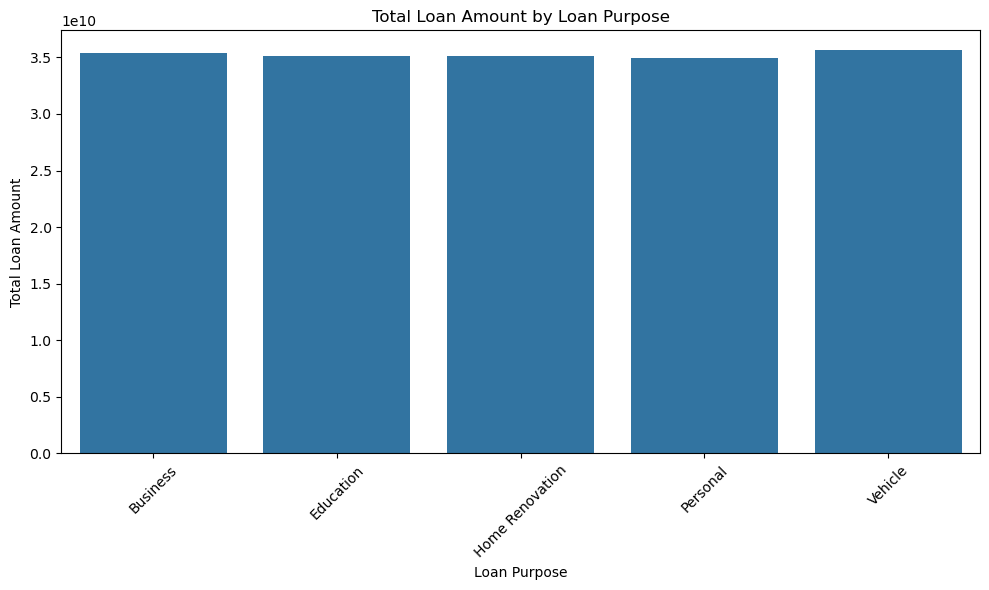

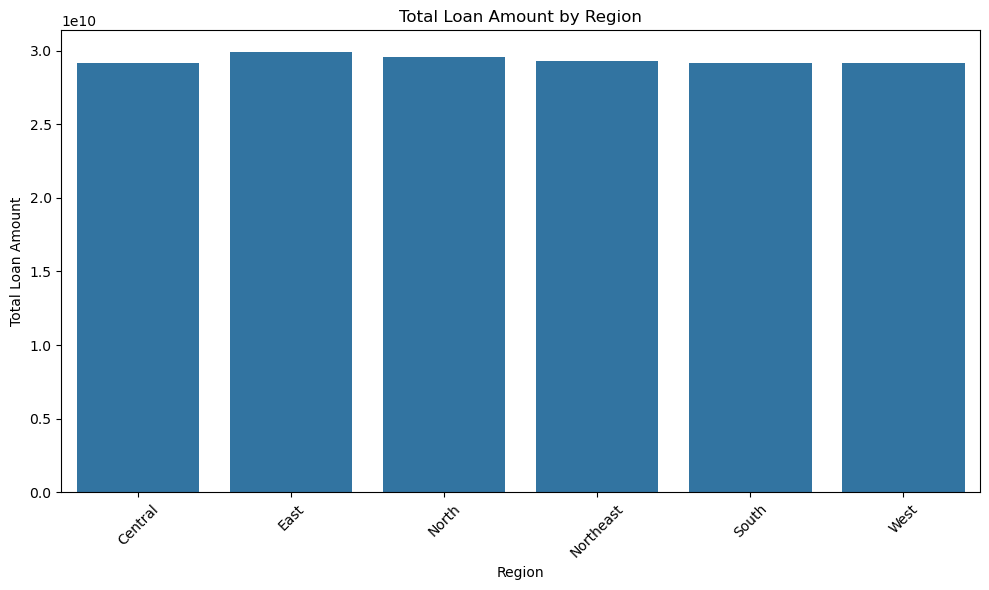

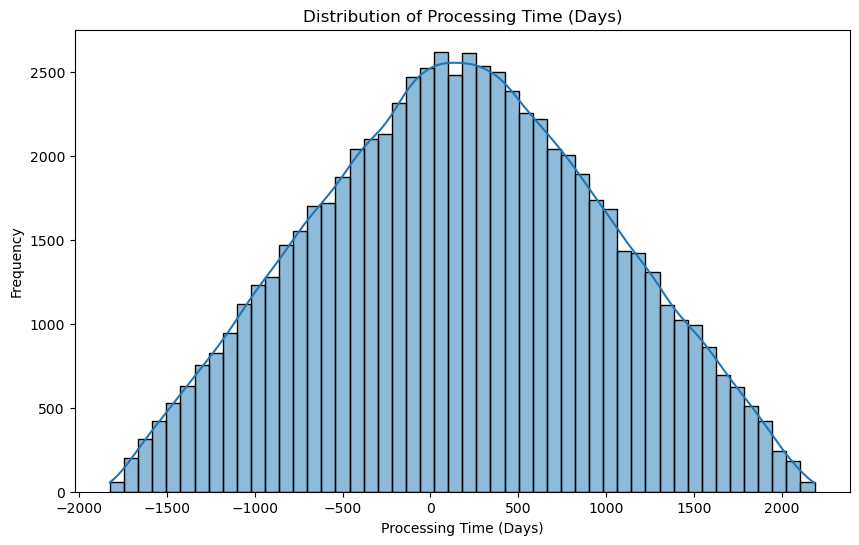

The histogram shows a distribution of processing times, including negative values which indicate errors in the data where the approval date was before the application date.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar plot for total loan amount by loan purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='Loan_Purpose', y='Loan_Amount', data=loan_amount_by_purpose)
plt.title('Total Loan Amount by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar plot for total loan amount by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Loan_Amount', data=loan_amount_by_region)
plt.title('Total Loan Amount by Region')
plt.xlabel('Region')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Histogram of Processing_Time_Days
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Processing_Time_Days'], bins=50, kde=True)
plt.title('Distribution of Processing Time (Days)')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Note the presence of negative values in the histogram.
print("The histogram shows a distribution of processing times, including negative values which indicate errors in the data where the approval date was before the application date.")

In [9]:
print("Key Insights Regarding Loan Disbursement Efficiency:")
print("\nProcessing Time Distribution:")
print("- The analysis of processing times revealed a significant number of negative values, indicating data quality issues where the disbursal date is recorded before the application date. This suggests errors in data entry or collection for these applications.")
print("- The distribution of positive processing times shows variability, and further investigation into applications with unusually long *positive* processing times (if any were identified beyond the initial negative value analysis) would be necessary to pinpoint specific bottlenecks in the process.")

print("\nDisbursement Trends:")
print("- The bar plots show the total loan amount disbursed by Loan Purpose and Region.")
print("- Loan disbursements are relatively evenly distributed across different loan purposes (Business, Education, Home Renovation, Personal, Vehicle). Vehicle loans appear to have the highest total disbursement amount, while Personal loans have the lowest.")
print("- Similarly, loan disbursements are also quite evenly distributed across different regions (Central, East, North, Northeast, South, West), with the East region showing the highest total disbursement and the South region the lowest.")

print("\nOther Relevant Insights:")
print("- The inability to calculate average processing times by branch highlights a data limitation. To analyze efficiency at a granular branch level, a dataset linking applications/loans to specific branches would be required.")
print("- While the analysis identified data quality issues in processing times, it did not reveal obvious major bottlenecks or disparities in disbursement amounts based solely on loan purpose or region. Further analysis incorporating other factors like customer demographics, credit scores, or application volume per branch might provide deeper insights into efficiency and potential bottlenecks.")

Key Insights Regarding Loan Disbursement Efficiency:

Processing Time Distribution:
- The analysis of processing times revealed a significant number of negative values, indicating data quality issues where the disbursal date is recorded before the application date. This suggests errors in data entry or collection for these applications.
- The distribution of positive processing times shows variability, and further investigation into applications with unusually long *positive* processing times (if any were identified beyond the initial negative value analysis) would be necessary to pinpoint specific bottlenecks in the process.

Disbursement Trends:
- The bar plots show the total loan amount disbursed by Loan Purpose and Region.
- Loan disbursements are relatively evenly distributed across different loan purposes (Business, Education, Home Renovation, Personal, Vehicle). Vehicle loans appear to have the highest total disbursement amount, while Personal loans have the lowest.
- Similarly,